# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [249]:
cData=pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [28]:
# check the data shape
cData.shape

(3454, 14)

3454 rows and 14 columns.

In [29]:
# check the first 5 rows of data
cData.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [174]:
# check column types and number of values
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Most of the columns are numeric. 
* Brand name, os, 4g, and 5g are string columns as is expected.

In [57]:
# check for duplicate values 
cData.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

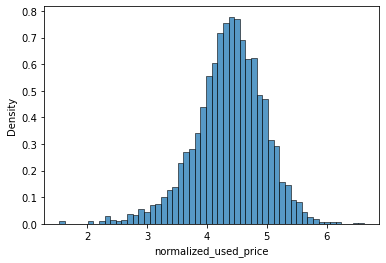

In [62]:
# What does the distribution of normalized used prices look like?
sns.histplot(data=cData,x='normalized_used_price',stat='density')
plt.show()

The normalized used price seems somewhat normally distributed, with a slight left tail.

<AxesSubplot:xlabel='os', ylabel='Density'>

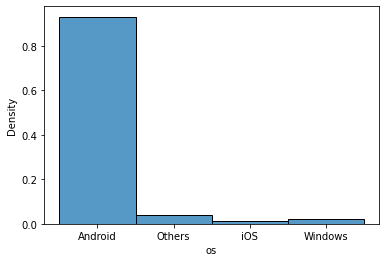

In [63]:
# What percentage of the used device market is dominated by Android devices?
sns.histplot(data=cData,x='os',stat='density')

Over 80% of the used device market is dominated by Android.

In [66]:
# How does the amount of ram vary by brand?
cData.groupby(['brand_name'])['int_memory'].mean()

brand_name
Acer           23.215686
Alcatel        35.966942
Apple          95.179487
Asus           51.803279
BlackBerry     57.454545
Celkon        215.272727
Coolpad        36.363636
Gionee         43.714286
Google         57.600000
HTC            33.018182
Honor          75.862069
Huawei         80.764940
Infinix        38.400000
Karbonn        66.758966
LG             37.930348
Lava          104.000000
Lenovo         42.292398
Meizu          58.580645
Micromax       47.063248
Microsoft      31.272727
Motorola       53.584906
Nokia          25.595882
OnePlus       141.818182
Oppo           85.457364
Others         41.633466
Panasonic      27.914894
Realme         70.634146
Samsung        48.234604
Sony           34.604651
Spice          49.600000
Vivo           86.051282
XOLO           22.204082
Xiaomi         81.212121
ZTE            46.057143
Name: int_memory, dtype: float64

Devices with the most ram are brand Celkon, OnePlus, and Lava. 

<AxesSubplot:xlabel='weight'>

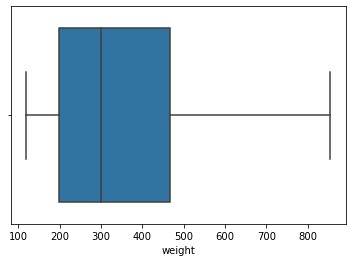

In [80]:
# How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
sns.boxplot(data=cData.loc[cData['battery']>4500],x='weight',showfliers=True)

The median is 300 and the range of the data lies between ~200-475.

In [93]:
# How many phones and tablets are available across different brands with a screen size larger than 6 inches?
len(cData.loc[cData['screen_size']>6]['brand_name'].unique())

34

There are 34 different phones and tables with screen sizes larger than 6 inches.

<AxesSubplot:xlabel='selfie_camera_mp'>

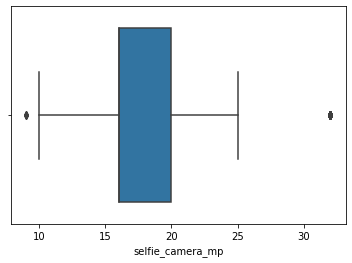

In [96]:
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?
sns.boxplot(data=cData.loc[cData['selfie_camera_mp']>8],x='selfie_camera_mp',showfliers=True)

Most above 8 MP lie between 15 and 20 MP, with the exception of outliers below 10 and above 30 MP.

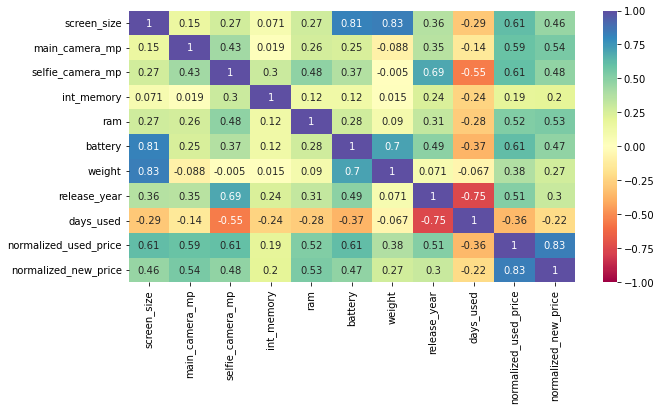

In [97]:
# Which attributes are highly correlated with the normalized price of a used device?
plt.figure(figsize=(10,5))
sns.heatmap(cData.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Normalized used price is correlated highly with release_year, battery, selfie_camera_mp, main_camera_mp, screensize, and normalized_new_price.

In [61]:
# check the statistical summary of the data
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


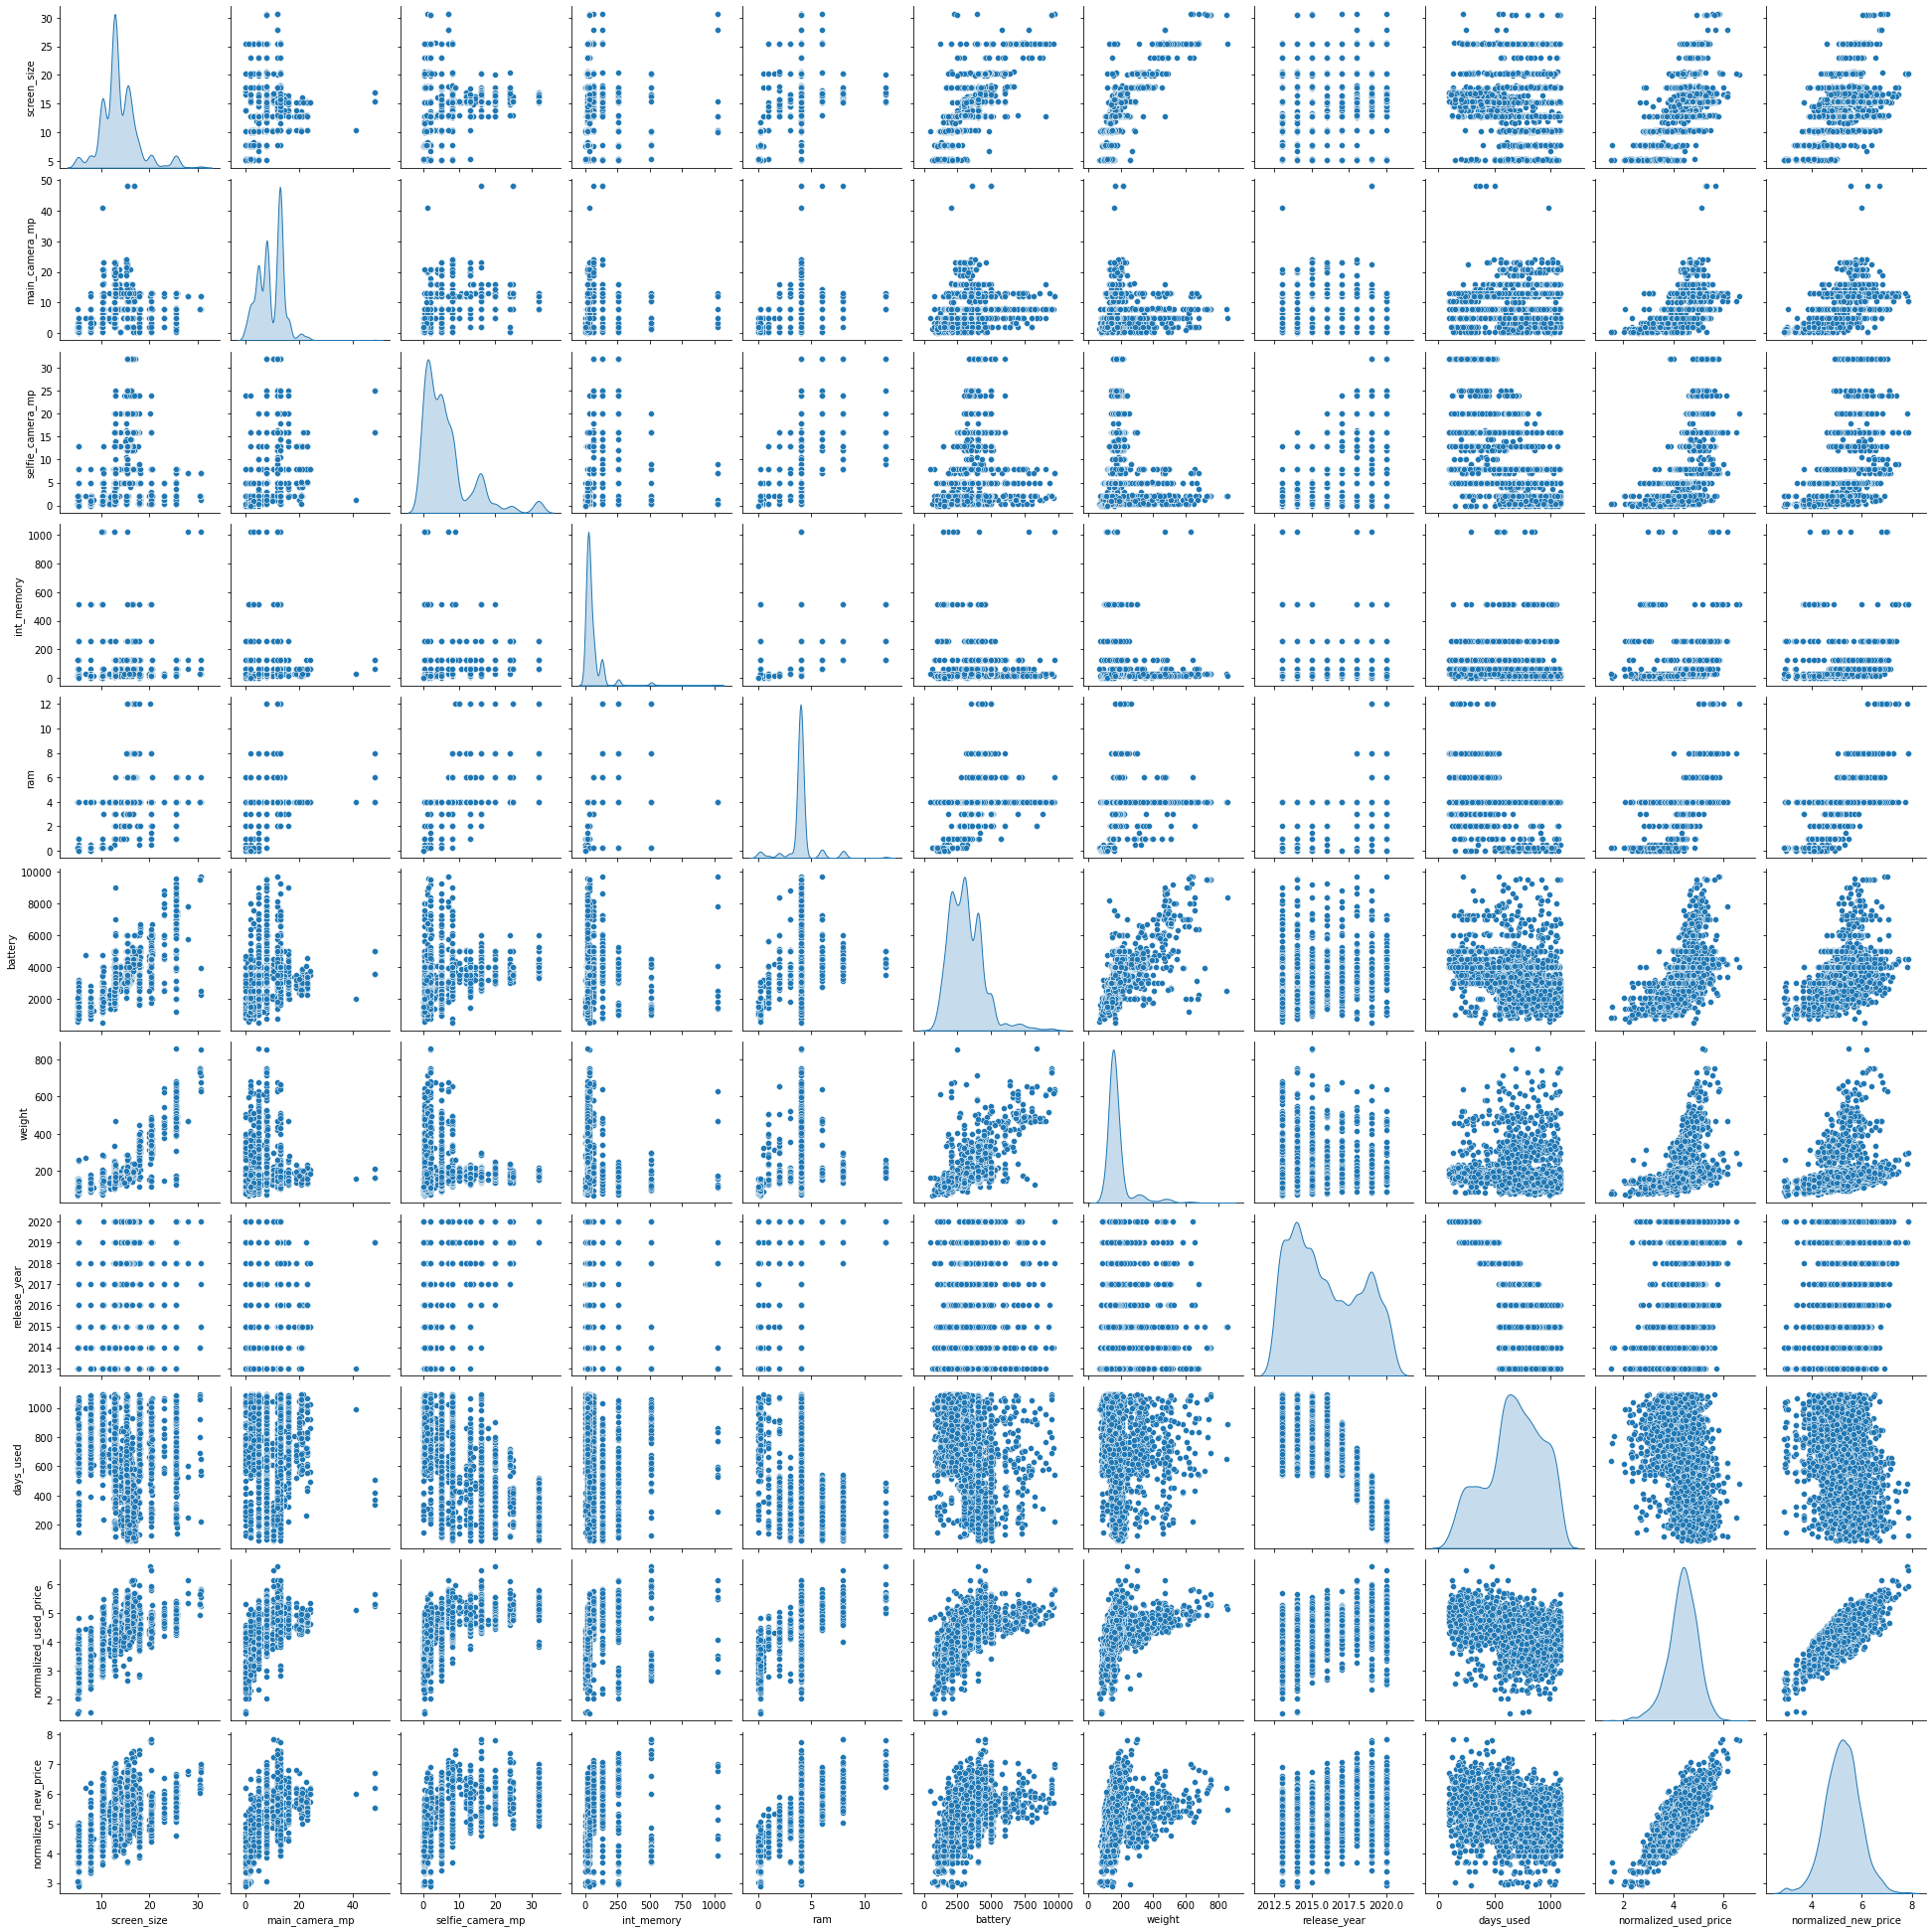

In [65]:
sns.pairplot(cData, diag_kind="kde")  # to plot density curve instead of histogram on the diag

* We see that the relationship between 'normalized_used_price' and 'int_memory', 'release_year', and 'days_used' are not really linear. 
* However, the plots also indicate that linearity would still capture quite a abit of useful information/patterns.
* Several assumptions of classical linear regression seem to be violated. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [250]:
# missing data treatment:
# (I wanted to do this the way it was done in class, with a lambda function, but that was creating strange
# objects in my dataset)
cData['main_camera_mp']=cData['main_camera_mp'].replace(np.nan,cData['main_camera_mp'].median())
cData['selfie_camera_mp']=cData['selfie_camera_mp'].replace(np.nan,cData['selfie_camera_mp'].median())
cData['int_memory']=cData['int_memory'].replace(np.nan,cData['int_memory'].median())
cData['ram']=cData['ram'].replace(np.nan,cData['ram'].median())
cData['battery']=cData['battery'].replace(np.nan,cData['battery'].median())
cData['int_memory']=cData['int_memory'].replace(np.nan,cData['int_memory'].median())
cData['weight']=cData['weight'].replace(np.nan,cData['weight'].median())
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [251]:
# Let's convert the 4g and 5g columns to use binary values
cData["4g"] = cData["4g"].replace({"yes": 1, "no": 0})
cData["5g"] = cData["5g"].replace({"yes": 1, "no": 0})
# Let's check that worked
cData.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [252]:
cData = pd.get_dummies(cData, columns=["os"], drop_first=True)

In [178]:
cData.head()

,brand_name,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS
0,Honor,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0,0,0
1,Honor,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0,0,0
2,Honor,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0,0,0
3,Honor,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,0,0,0
4,Honor,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0,0,0


In [253]:
# Looks like that worked! Now let's check for outliers:
# Find the percentage of outliers:
numeric_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery','weight',
                   'release_year', 'normalized_used_price','normalized_new_price']
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = cData[numeric_columns].quantile(0.25)
Q3 = cData[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR
# Percentage of outliers in each column
((cData[numeric_columns] < lower_whisker) | (cData[numeric_columns] > upper_whisker)).sum()/cData.shape[0]*100

screen_size              13.028373
main_camera_mp            0.144760
selfie_camera_mp          6.398379
int_memory                3.995368
ram                      18.384482
battery                   2.229299
weight                   10.654314
release_year              0.000000
normalized_used_price     2.460915
normalized_new_price      1.910828
dtype: float64

Every numeric column has some outliers, so let's create a function to treat it.

In [254]:
def treat_outliers(cData, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = cData[col].quantile(0.25)  # 25th quantile
    Q3 = cData[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    cData[col] = np.clip(cData[col], lower_whisker, upper_whisker)

    return cData

In [255]:
# treat outliers:
cData = treat_outliers(cData,'screen_size')
cData = treat_outliers(cData,'main_camera_mp')
cData = treat_outliers(cData,'selfie_camera_mp')
cData = treat_outliers(cData,'int_memory')
cData = treat_outliers(cData,'ram')
cData = treat_outliers(cData,'battery')
cData = treat_outliers(cData,'weight')
cData = treat_outliers(cData,'release_year')
cData = treat_outliers(cData,'normalized_used_price')
cData = treat_outliers(cData,'normalized_new_price')

In [256]:
# Let's check outliers now:
((cData[numeric_columns] < lower_whisker) | (cData[numeric_columns] > upper_whisker)).sum()/cData.shape[0]*100

screen_size              0.0
main_camera_mp           0.0
selfie_camera_mp         0.0
int_memory               0.0
ram                      0.0
battery                  0.0
weight                   0.0
release_year             0.0
normalized_used_price    0.0
normalized_new_price     0.0
dtype: float64

In [ ]:
Looks good.

In [262]:
# Lastly, let's drop the brand_name:
cData=cData.drop(["brand_name"],axis=1)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [257]:
# check to see all values there and look good
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   screen_size            3454 non-null   float64
 2   4g                     3454 non-null   int64  
 3   5g                     3454 non-null   int64  
 4   main_camera_mp         3454 non-null   float64
 5   selfie_camera_mp       3454 non-null   float64
 6   int_memory             3454 non-null   float64
 7   ram                    3454 non-null   float64
 8   battery                3454 non-null   float64
 9   weight                 3454 non-null   float64
 10  release_year           3454 non-null   int64  
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  os_Others              3454 non-null   uint8  
 15  os_W

## Model Building - Linear Regression

Split Data:

In [263]:
# independent variables:
X=cData.drop(["normalized_used_price"],axis=1)
# dependent variable:
y=cData[["normalized_used_price"]]
# add the intercept to data
X=sm.add_constant(X)
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [259]:
print(X_train.head())

     brand_name  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
3026       XOLO        10.29   0   0             8.0               0.3   
1525     Lenovo        15.34   1   0            13.0               5.0   
1128      Honor        12.70   0   0            13.0               5.0   
3003       XOLO        12.83   1   0             8.0               5.0   
2907     Others        12.88   1   0            13.0              16.0   

      int_memory  ram  battery  weight  release_year  days_used  \
3026        16.0  4.0   1800.0   120.0          2014        819   
1525        32.0  4.0   4050.0   225.0          2016        585   
1128        32.0  4.0   2550.0   162.0          2015        727   
3003        16.0  4.0   3200.0   160.0          2015        800   
2907        16.0  4.0   2900.0   160.0          2017        560   

      normalized_new_price  os_Others  os_Windows  os_iOS  
3026              4.796204          0           0       0  
1525              5.434595      

In [260]:
print(X_test.head())

     brand_name  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
866      Others        15.24   0   0            8.00               2.0   
957      Celkon        10.16   0   0            3.15               0.3   
280     Infinix        15.39   1   0            8.00               8.0   
2150       Oppo        12.83   1   0           13.00              16.0   
93           LG        15.29   1   0           13.00               5.0   

      int_memory  ram  battery  weight  release_year  days_used  \
866         16.0  4.0   3000.0   206.0          2014        632   
957        136.0  4.0   1400.0   140.0          2013        637   
280         32.0  4.0   5000.0   185.0          2020        329   
2150        64.0  4.0   3200.0   148.0          2017        648   
93          32.0  4.0   3500.0   179.0          2019        216   

      normalized_new_price  os_Others  os_Windows  os_iOS  
866               5.190788          0           0       0  
957               3.884652      

Fit linear model:

In [264]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

## Model Performance Check

In [265]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     908.2
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           20:27:20   Log-Likelihood:                 200.34
No. Observations:                   2417   AIC:                            -370.7
Df Residuals:                       2402   BIC:                            -283.8
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sc

* The R-squared value tells us that our model can explain 84.1% of the variance in the training set.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [266]:
# check the VIF of the predictors:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

screen_size             5.034630e+00
4g                      2.305087e+00
5g                      1.399924e+00
main_camera_mp          2.069566e+00
selfie_camera_mp        3.512189e+00
int_memory              2.148681e+00
ram                     3.909098e+06
battery                 3.520182e+00
weight                  4.343120e+00
release_year            5.047636e+00
days_used               2.590901e+00
normalized_new_price    2.665477e+00
os_Others               1.227678e+00
os_Windows              1.022182e+00
os_iOS                  1.090700e+00
dtype: float64



Now we will remove multicollinear columns one at a time to observe the effect on our predictive model.

In [267]:
# First we will remove screen_size
X_train13 = X_train.drop(["screen_size"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.833 
Adjusted R-squared: 0.833


On dropping screen_size, the adjusted R-squared dropped by .8. That means it's a pretty important predictor. Let's try dropping release_year instead.

In [268]:
# First we will remove screen_size
X_train14 = X_train.drop(["release_year"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.841 
Adjusted R-squared: 0.84


Upon dropping the release_year, the adjusted R-squared only decreased by .1. Since there is a very small effect after dropping "release_year", we can remove it from the training set.

In [269]:
X_train = X_train.drop(["release_year"], axis=1)

In [270]:
olsmod_15 = sm.OLS(y_train, X_train)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     977.5
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           20:27:34   Log-Likelihood:                 199.35
No. Observations:                   2417   AIC:                            -370.7
Df Residuals:                       2403   BIC:                            -289.6
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sc

Let's check if multicollinearity is still present in the data:

In [271]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

screen_size               4.962808
4g                        1.920596
5g                        1.383098
main_camera_mp            2.064544
selfie_camera_mp          3.010637
int_memory                2.104936
ram                     126.423212
battery                   3.442247
weight                    4.328496
days_used                 1.867975
normalized_new_price      2.347710
os_Others                 1.227675
os_Windows                1.022137
os_iOS                    1.081679
dtype: float64



Now we see multicollinearity in ram. Let's go ahead and drop it.

In [272]:
X_train = X_train.drop(["ram"], axis=1)

In [273]:
# Check multicollinearity again:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

screen_size             105.055239
4g                        5.935387
5g                        1.423714
main_camera_mp           10.828711
selfie_camera_mp          6.737862
int_memory                4.816775
battery                  24.303882
weight                   82.002869
days_used                13.866780
normalized_new_price     78.690483
os_Others                 1.132045
os_Windows                1.040252
os_iOS                    1.058703
dtype: float64



In [274]:
# Remove screen_size because of multicollinearity:
X_train = X_train.drop(["screen_size"], axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

4g                       5.935362
5g                       1.415407
main_camera_mp          10.802802
selfie_camera_mp         6.644535
int_memory               4.812701
battery                 22.412678
weight                  47.546139
days_used               13.847745
normalized_new_price    68.654915
os_Others                1.131273
os_Windows               1.040252
os_iOS                   1.048377
dtype: float64



In [275]:
# Remove normalized_new_price:
X_train = X_train.drop(["normalized_new_price"], axis=1)
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series5))

Series before feature selection: 

4g                   5.791466
5g                   1.363624
main_camera_mp       9.008092
selfie_camera_mp     6.495687
int_memory           4.460849
battery             22.382812
weight              32.418013
days_used            8.603399
os_Others            1.113217
os_Windows           1.036190
os_iOS               1.038081
dtype: float64



In [276]:
# Remove weight:
X_train = X_train.drop(["weight"], axis=1)
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series6))

Series before feature selection: 

4g                  5.785535
5g                  1.351576
main_camera_mp      8.998586
selfie_camera_mp    6.495159
int_memory          4.363537
battery             7.601756
days_used           5.203375
os_Others           1.112537
os_Windows          1.034967
os_iOS              1.035213
dtype: float64



In [277]:
# Remove main_camera_mp:
X_train = X_train.drop(["main_camera_mp"], axis=1)
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series7))

Series before feature selection: 

4g                  4.788379
5g                  1.328027
selfie_camera_mp    5.777525
int_memory          4.362832
battery             7.561853
days_used           3.764375
os_Others           1.083883
os_Windows          1.034907
os_iOS              1.034594
dtype: float64



In [278]:
# Remove battery:
X_train = X_train.drop(["battery"], axis=1)
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series8))

Series before feature selection: 

4g                  4.253455
5g                  1.320424
selfie_camera_mp    5.511851
int_memory          4.187238
days_used           2.278159
os_Others           1.079960
os_Windows          1.032973
os_iOS              1.028008
dtype: float64



In [279]:
# Remove selfie_camera_mp:
X_train = X_train.drop(["selfie_camera_mp"], axis=1)
vif_series9 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series9))

Series before feature selection: 

4g            2.917955
5g            1.311693
int_memory    2.673403
days_used     2.247428
os_Others     1.066273
os_Windows    1.031856
os_iOS        1.020373
dtype: float64



VIF for all features is <3

### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [280]:
olsmod_16 = sm.OLS(y_train, X_train)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.957
Model:                               OLS   Adj. R-squared (uncentered):              0.957
Method:                    Least Squares   F-statistic:                              7645.
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):                        0.00
Time:                           20:28:15   Log-Likelihood:                         -3215.9
No. Observations:                   2417   AIC:                                      6446.
Df Residuals:                       2410   BIC:                                      6486.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [281]:
#drop the os variables (with high p valyes)
X_train17 = X_train.drop(["os_Others","os_Windows","os_iOS"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(olsres_17.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.957
Model:                               OLS   Adj. R-squared (uncentered):              0.957
Method:                    Least Squares   F-statistic:                          1.336e+04
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):                        0.00
Time:                           20:28:19   Log-Likelihood:                         -3219.1
No. Observations:                   2417   AIC:                                      6446.
Df Residuals:                       2413   BIC:                                      6469.
Df Model:                              4                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [244]:
# Let's check our other assumptions:

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_17.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_17.resid.values  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
0,4.087488,3.242572,0.844916
1,4.448399,4.092228,0.356171
2,4.315353,3.185300,1.130052
3,4.282068,4.595033,-0.312964
4,4.456438,3.725700,0.730738


**Test for linearity and independence:**

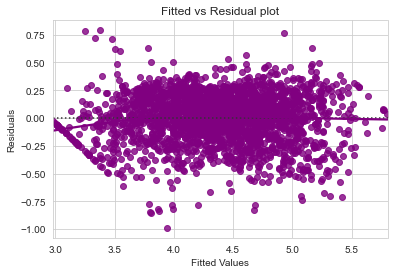

In [222]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

It appears there is no pattern in the residuals so we do not need to do transformations.

**Test for normality:**

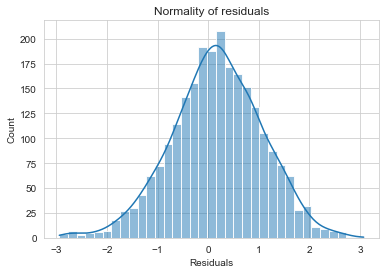

In [245]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

In [ ]:
The residuals appear mostly normally distributed.

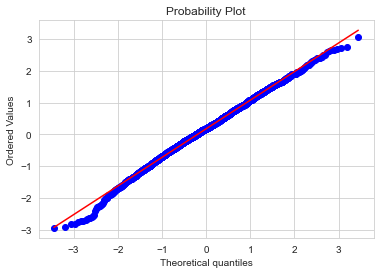

In [246]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Most of the points are lying on the straight line in the QQ plot.

In [226]:
# Shapiro-Wilk test:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9811474084854126, pvalue=2.254865729370359e-17)

P values is <.05, so the residuals are not normal. However, it is close enough to normal.

**Test for Homoscedasticity** 

In [247]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 0.9490186844462871), ('p-value', 0.8177017017389611)]

The p value is > .05 so it appears we do not have to worry about homoscedasticity. All of our assumptions for linear regression have been met.

## Final Model

In [282]:
print(olsres_17.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.957
Model:                               OLS   Adj. R-squared (uncentered):              0.957
Method:                    Least Squares   F-statistic:                          1.336e+04
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):                        0.00
Time:                           20:28:28   Log-Likelihood:                         -3219.1
No. Observations:                   2417   AIC:                                      6446.
Df Residuals:                       2413   BIC:                                      6469.
Df Model:                              4                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

## Actionable Insights and Recommendations 

- Prediction: We can make a prediction on the test data with the following parameters:


In [284]:
olsres_17.params

4g            1.421283
5g            0.803268
int_memory    0.017248
days_used     0.003622
dtype: float64

___